In [6]:
using Apophis, BenchmarkTools, Test, LinearAlgebra, Colors, KernelDensity

In [49]:
function XtoY(gas, X)
    W = gas.mechanism.molecular_weight
    W̅ = inv(X ⋅ W)
    Y = zero(X)
    for i in eachindex(gas.mechanism.species)
        Y[i] = X[i] * W[i] * W̅
    end
    return Y
end
XtoY(gas, [0.0, 0.09, 0.0, 0.18, 0.0, 0.0, 0.73, 0.0, 0.0, 0.0]);

In [7]:
#init(:H2, 1000.0, 1.59e6; rand = fractions)
#realgas = gas
init(:H2, 1250.0, 1.59e6, H2=0.29, N2=0.56, O2=0.15)
#init(:H2, 925.0, H2=0.006873985704477817, N2=0.7748777866398976, O2=0.21824822765562468)
#init(:GRI3, 1000.0, CH4=0.05, N2=0.75, O2=0.2)
#gas(:H2, 1000.0, 1.0e6, H2 = 0.29, N2 = 0.56, O2 = 0.15);
#gas(:H2, 900.0, Pₐ, H2 = 0.09, N2 = 0.73, O2 = 0.18)
#gas(:H2, 2000.0, 1.65Pₐ, H2 = 0.09, N2 = 0.73, O2 = 0.18)
#gas(:H2, 925.0, 2Pₐ, H2 = 0.33, N2 = 0.0, O2 = 0.67);

In [87]:
dJdg, tᵢ, tᵣ, J = Apophis.sensitivity(gas)
s = dJdg .* vcat(gas.mechanism.pressure_independant_parameters[:, 1], gas.mechanism.high_pressure_parameters[:, 1]) / J
reactions


5-element Vector{SubString{String}}:
 "H+O2 = O+OH"
 "O+H2 = H+OH"
 "HO2+H = OH+OH"
 "OH+H2 = H+H2O"
 "O+H2O = OH+OH"

In [110]:
set_theme!(publication_themes)

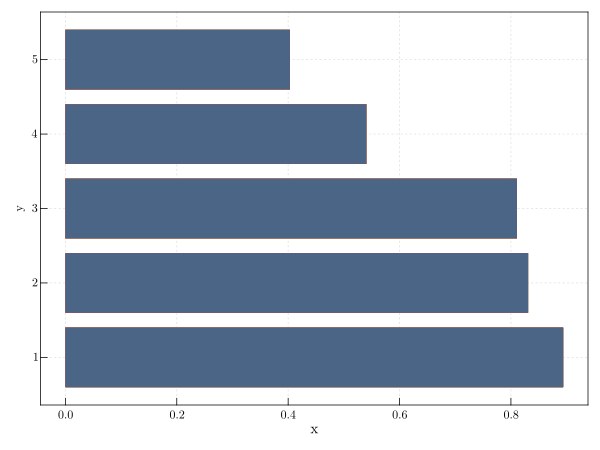

In [120]:
dJdg_norm = first(sort(normalize(s, Inf), rev = true), 5)
reactions = first(gas.mechanism.reactions[sortperm(normalize(s, Inf), rev = true)], 5)

fig = Figure()
Axis(fig[1, 1])

fig

In [32]:
gas.mechanism.reactions[86]

"OH+C2H2<=>H+CH2CO"

In [8]:
s = 250
y, W, f, fLLAM, J, λ, xₒ = subspaces(gas, s) ## Who Y
ymore, fLLAMmore, fmore = monte(gas, W, 1000)

([0.4417070208083953, 0.5546588224839663, -0.7020989364968508, 1.8535096939261437, 1.7193840758586536, 0.4476964380390282, 0.31276528333847, -1.0582500267320605, -1.3614064765262635, -0.5811263291237961  …  0.17408869962382, -0.2004367935134329, 0.0707527075587269, -0.4718630550149229, 1.7995717283724584, -1.96371558341561, 0.533013642165767, 1.7879578190858092, -0.26549749672748935, 0.3403871755943256], [6.95158393984044e-5, 6.782725439854689e-5, 8.674421984193283e-5, 4.8180667194832554e-5, 5.0270464319414526e-5, 6.934226429091354e-5, 7.137216071539788e-5, 9.210320703642363e-5, 9.659756518586607e-5, 8.48673460527924e-5  …  7.346547970574838e-5, 7.917356907209557e-5, 7.50289967863235e-5, 8.311936144015893e-5, 4.900164805521669e-5, 0.00010569615733824076, 6.802318568476483e-5, 4.917684485586168e-5, 8.00790968384581e-5, 7.101054618272664e-5], [8.051023040964738e-5, 8.149680404534707e-5, 6.945473939868731e-5, 9.558627512032994e-5, 9.439811209721157e-5, 8.069834861550314e-5, 7.977586378326

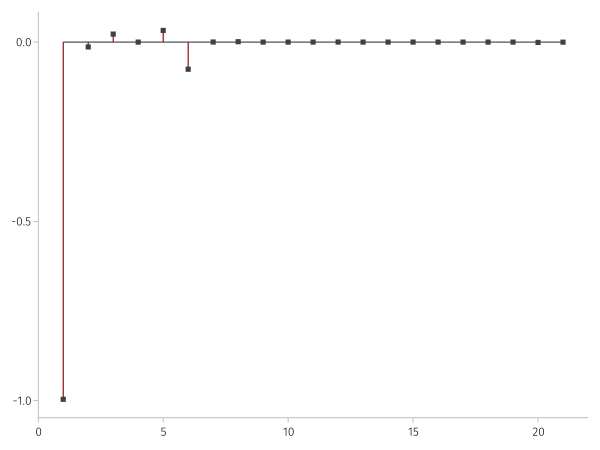

In [30]:
stem(collect(1:21), W[:, end], marker=:rect, strokecolor = :darkred, stemcolor = :darkred)

In [15]:
1

1

In [4]:
using Polynomials: fit
Gfit = fit(y, f, 3)
G = map(a -> Gfit(a), ymore)

1000-element Vector{Float64}:
 6.411272478196634e-5
 5.8325499040859866e-5
 6.120476327929604e-5
 5.712332722185269e-5
 8.237830867785589e-5
 9.414249806379994e-5
 8.243295078597058e-5
 9.872358439497059e-5
 7.439060586132375e-5
 8.141602899199889e-5
 ⋮
 7.110065904010441e-5
 6.553125654796109e-5
 8.959269852864791e-5
 8.224954284739326e-5
 8.286028683579619e-5
 7.85328816131003e-5
 7.48998722812437e-5
 6.903518574301925e-5
 7.075552250781189e-5

In [11]:
using CairoMakie, AlgebraOfGraphics
CairoMakie.activate!(type="svg")
set_aog_theme!()

scatter(y, (f), color=(paperred, 0.75), strokewidth=.4)

UndefVarError: UndefVarError: paperred not defined

In [123]:
fig = Figure()
Axis(fig[1, 1], xlabel = L"IDT")

fmoreplot = CairoMakie.density!(fmore, color=(paperblue, 0.075),
    strokecolor=(paperblue, 1.0), strokewidth=1.25, label="Monte Carlo")
gplot = CairoMakie.density!(G, color=(paperred, 0.075),
    strokecolor=(paperred, 1.0), strokewidth=1.25, label="Active Subspaces")
LLAMplot = CairoMakie.density!(fLLAMmore, color=(papergreen, 0.075),
    strokecolor=(papergreen, 1.0), strokewidth=1.25, label="LLAM")

axislegend("Best Title", position=:rc)
fig

In [1]:
5

5

In [2]:
e₁ = [1, 0, 0]; e₂ = [0, 1, 0]; e₃ = [0, 0, 1]

3-element Vector{Int64}:
 0
 0
 1

In [5]:
e₁ * e₂'

3×3 Matrix{Int64}:
 0  1  0
 0  0  0
 0  0  0